In [1]:
from Parameters import *
import ROOT as rt

Welcome to JupyROOT 6.24/06


/uscms_data/d3/ahayrape/mamba/envs/anal/lib/python3.9/site-packages/numba/core/cpu.py:97: UserWarning: Numba extension module 'awkward.numba' failed to load due to 'FileNotFoundError([Errno 2] No such file or directory: '/uscms_data/d3/ahayrape/mamba/envs/anal/lib/python3.9/site-packages/numpy-1.23.2.dist-info/METADATA')'.
  numba.core.entrypoints.init_all()


In [2]:
MuonSystem = "DT"
filename = f'./Pickles/Output_Signal_{MuonSystem}.pickle'
file = open(filename, 'rb')
data = pickle.load(file)
file.close()
datasets = [
    'PhiToPi0Pi0_mPhi1p0_ctau1000',
    'PhiToPi0Pi0_mPhi0p3_ctau300',
    'PhiToPiPlusPiMinus_mPhi0p3_ctau300',
    'PhiToPiPlusPiMinus_mPhi1p0_ctau300',
    'PhiToPiPlusPiMinus_mPhi1p0_ctau1000',
    'background'
]

In [4]:
warnings.filterwarnings("ignore")
rt.gStyle.SetOptStat(0)
a = 1
variables   = ["matched_track_pt_sum_0p2",
               "matched_track_pt_sum_0p3",
               "matched_track_pt_sum_0p4",
               "matched_track_pt_sum_0p5",
               "matched_track_size_0p2", 
               "matched_track_size_0p3", 
               "matched_track_size_0p4", 
               "matched_track_size_0p5"]
x_axis_name = variables
image_names = variables
range_from  = [0, 0, 0, 0, 0, 0, 0, 0, 0]
range_to    = [100, 100, 100, 100, 100, 100, 100, 100]
cuts        = {
    "CSC": ["-5 < cls_time < 12.5", "|cls_timeSpread| < 20", "|cls_eta| < 1.9", "cut_based_ID"],
    "DT" : ["muon_veto", "mb1_veto", "rpc_time_cut", "mb1_adjacent"]
}
the_cuts    = cuts[MuonSystem]

bins = 100
hist = list(np.zeros(len(datasets)))
colors = [2,3,4,5,6,1]
for k, the_cut in enumerate(the_cuts):
    for j, variable in enumerate(variables):
        name = f"{the_cut}_{variable}"
        c = rt.TCanvas(name, name, 800, 600)
        l = rt.TLegend(0.75, 0.8, 1, 1)
        img = rt.TImage.Create()
        for i, dset in enumerate(datasets):
            # if i != 0: continue
            var = np.array(data[f"{dset}_vars"][f"{variable} with {the_cut}"])
            # print(np.array(data[f"{dset}_vars"][f"{variable} with {the_cut}"]))
            if "pt" in variable:
                var[var == -777] = 0
            if "matched_track_pt_sum" in variable:
                hist[i] = rt.TH1D(f"{name}_{i}", f"{name}_{i}", 100, range_from[j],  range_to[j])
            else:
                hist[i] = rt.TH1D(f"{name}_{i}", f"{name}_{i}", 100, range_from[j],  range_to[j])
            hist[i].SetXTitle(x_axis_name[j])
            hist[i].SetYTitle("Events")
            weights = np.ones(len(var)) / len(var)
            if variable == "matched_track_size_0p2" and dset == "background":
                rtnp.fill_hist(hist[i], var)
                print(f"matched_track_size_0p2: {hist[i].Integral()}")    
            if variable == "matched_track_size_0p5" and dset == "background":
                rtnp.fill_hist(hist[i], var)
                print(f"matched_track_size_0p5: {hist[i].Integral()}")
            rtnp.fill_hist(hist[i], var, weights = weights)
            hist[i].SetLineColor(colors[i])
            hist[i].SetLineWidth(2)
            # if "matched_track_pt_sum" in variable:
            #     hist[i].GetXaxis().SetRangeUser(0, 30)
            hist[i].Draw("HIST same")
            l.AddEntry(hist[i], dset)
        c.SetLogy()
        l.Draw("same")
        c.Draw()
        img.FromPad(c)
        img.WriteImage(f"./Track_data/{MuonSystem}/{name}.png")
        c.Close()

matched_track_size_0p2: 20671.0
matched_track_size_0p5: 20668.0
matched_track_size_0p2: 364.0
matched_track_size_0p5: 364.0
matched_track_size_0p2: 124.0
matched_track_size_0p5: 124.0
matched_track_size_0p2: 116.0
matched_track_size_0p5: 116.0


Warning in <TROOT::Append>: Replacing existing TH1: mb1_adjacent_matched_track_size_0p5_0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: mb1_adjacent_matched_track_size_0p5_1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: mb1_adjacent_matched_track_size_0p5_2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: mb1_adjacent_matched_track_size_0p5_3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: mb1_adjacent_matched_track_size_0p5_4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: mb1_adjacent_matched_track_size_0p5_5 (Potential memory leak).


PhiToPi0Pi0_mPhi1p0_ctau1000 40 GeV:  0.9276623376623376
PhiToPi0Pi0_mPhi1p0_ctau1000 30 GeV:  0.8558441558441559
PhiToPi0Pi0_mPhi1p0_ctau1000 20 GeV:  0.7064935064935065

PhiToPi0Pi0_mPhi0p3_ctau300 40 GeV:  0.9272923118351959
PhiToPi0Pi0_mPhi0p3_ctau300 30 GeV:  0.855392486872223
PhiToPi0Pi0_mPhi0p3_ctau300 20 GeV:  0.7012252591894439

PhiToPiPlusPiMinus_mPhi0p3_ctau300 40 GeV:  0.9045614035087719
PhiToPiPlusPiMinus_mPhi0p3_ctau300 30 GeV:  0.8259649122807018
PhiToPiPlusPiMinus_mPhi0p3_ctau300 20 GeV:  0.6654970760233918

PhiToPiPlusPiMinus_mPhi1p0_ctau300 40 GeV:  0.8697916666666666
PhiToPiPlusPiMinus_mPhi1p0_ctau300 30 GeV:  0.7840169270833334
PhiToPiPlusPiMinus_mPhi1p0_ctau300 20 GeV:  0.61572265625

PhiToPiPlusPiMinus_mPhi1p0_ctau1000 40 GeV:  0.9070603823585084
PhiToPiPlusPiMinus_mPhi1p0_ctau1000 30 GeV:  0.8232065114518267
PhiToPiPlusPiMinus_mPhi1p0_ctau1000 20 GeV:  0.6700738216922203

background 40 GeV:  0.7538096850660345
background 30 GeV:  0.6455420637608243
background 20 

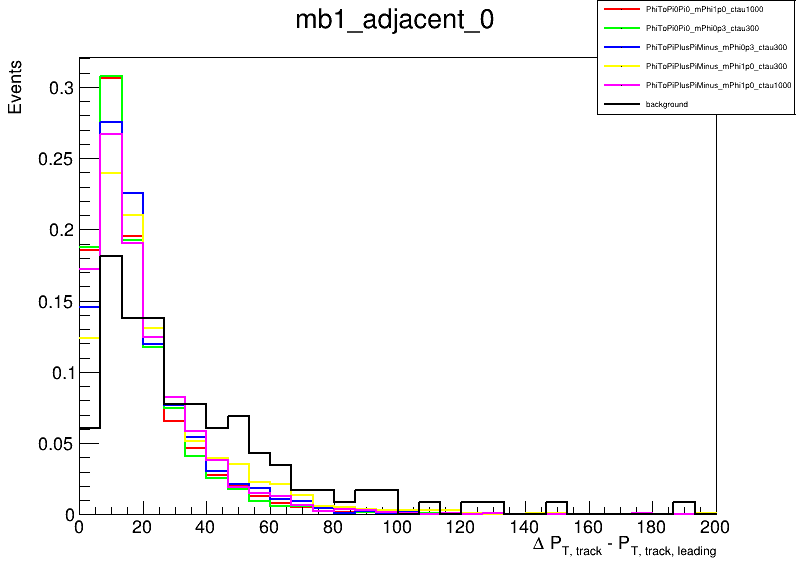

In [8]:
warnings.filterwarnings("ignore")
rt.gStyle.SetOptStat(0)
a = 1
cuts = {
    "CSC": ["-5 < cls_time < 12.5", "|cls_timeSpread| < 20", "|cls_eta| < 1.9", "cut_based_ID"],
    "DT" : ["muon_veto", "mb1_veto", "rpc_time_cut", "mb1_adjacent"]
}
the_cuts = cuts[MuonSystem]

bins = 30
hist = list(np.zeros(len(datasets)))
colors = [2,3,4,5,6,1]

for cut in cuts[MuonSystem]:
    c = rt.TCanvas(cut, cut, 800, 600)
    l = rt.TLegend(0.75, 0.8, 1, 1)
    for i, sets in enumerate(datasets):
        sum_pt  = np.array(data[f"{sets}_vars"][f"matched_track_pt_sum_0p5 with {cut}"])
        lead_pt = np.array(data[f"{sets}_vars"][f"matched_lead_track_pt_0p5 with {cut}"])
        lead_pt[lead_pt < 0] = 0
        diff = sum_pt - lead_pt
        print(f"{sets} 40 GeV: ", sum(diff < 40) / len(diff))
        print(f"{sets} 30 GeV: ", sum(diff < 30) / len(diff))
        print(f"{sets} 20 GeV: ", sum(diff < 20) / len(diff))
        print()
        hist[i] = rt.TH1F(f"{cut}_{i}", f"{cut}_{i}", 30, 0, 200)
        weights = np.ones(len(diff)) * (1 / len(diff))
        rtnp.fill_hist(hist[i], diff, weights = weights)
        hist[i].SetLineColor(colors[i])
        hist[i].SetLineWidth(2)
        hist[i].SetXTitle("#Delta P_{T, track} - P_{T, track, leading}")
        hist[i].SetYTitle("Events")
        hist[i].Draw("HIST same")
        l.AddEntry(hist[i], sets)
    print()
    c.Draw("same")
    l.Draw("same")

<h1>ROC curve</h1>

Warning in <TCanvas::Constructor>: Deleting canvas with same name: ROC curve
Warning in <TCanvas::Constructor>: Deleting canvas with same name: ROC curve
Warning in <TCanvas::Constructor>: Deleting canvas with same name: ROC curve
Warning in <TCanvas::Constructor>: Deleting canvas with same name: ROC curve


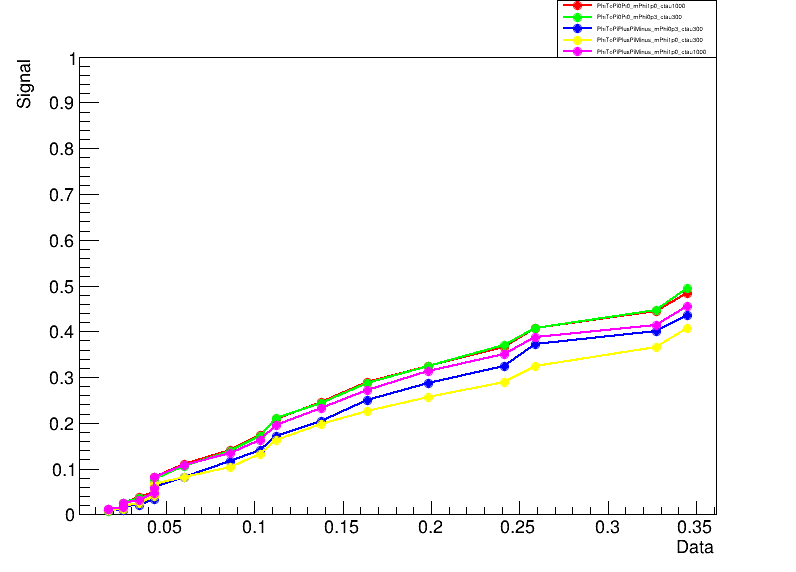

In [8]:
for f in [2,3,4,5]:
    cuts        = {
        "CSC": "cut_based_ID",
        "DT" : "mb1_adjacent"
    }
    the_cut     = cuts[MuonSystem]
    variable    = f"matched_track_size_0p{f}"

    eff = {}
    eff_data = []
    for i, dset in enumerate(datasets):
        if dset != "background":
            eff[dset] = []
            var = np.array(data[f"{dset}_vars"][f"{variable} with {the_cut}"])
            for j in range(0, 20):
                eff[dset].append(len(var[var < j+1]) / len(var))
        else:
            var = np.array(data[f"{dset}_vars"][f"{variable} with {the_cut}"])
            for j in range(0, 20):
                eff_data.append(len(var[var < j+1]) / len(var))
    c = rt.TCanvas("ROC curve", "ROC curve", 800, 600)
    img = rt.TImage.Create()
    l = rt.TLegend(0.7, 0.9, 0.9, 1)
    colors = [2,3,4,5,6,1]
    gr = []
    datasets = [
        'PhiToPi0Pi0_mPhi1p0_ctau1000',
        'PhiToPi0Pi0_mPhi0p3_ctau300',
        'PhiToPiPlusPiMinus_mPhi0p3_ctau300',
        'PhiToPiPlusPiMinus_mPhi1p0_ctau300',
        'PhiToPiPlusPiMinus_mPhi1p0_ctau1000',
        'background',
    ]
    mg = rt.TMultiGraph()

    for i, dset in enumerate(datasets):
        if dset != "background":
            e  = eff[dset]
            gr.append(rt.TGraph(len(eff_data), np.array(eff_data), np.array(eff[dset])))
            # gr[i].GetXaxis().SetRangeUser(0, 1)
            gr[i].SetLineColor(colors[i])
            gr[i].SetLineWidth(2)
            gr[i].SetMarkerColor(colors[i])
            gr[i].SetMarkerStyle(8)
            mg.Add(gr[i])
            l.AddEntry(gr[i], dset)
            # if i == 0:
            #     gr[i].Draw("ALP")
            # else:
            #     gr[i].Draw("ALP same")
    mg.GetXaxis().SetTitle("Data")
    mg.GetYaxis().SetTitle("Signal")
    mg.GetYaxis().SetRangeUser(0, 1)
    mg.Draw("APL")
    #c.SetLogy()
    #c.SetLogx()
    l.Draw("same")
    c.Draw()
    img.FromPad(c)
    img.WriteImage(f"./Track_data/{MuonSystem}/ROC_curve_nTracks_0p{f}.png")